In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn import metrics

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings("ignore")

**1. Load the dataset (The Street View House Numbers (SVHN) Dataset) from the given link: https://www.tensorflow.org/datasets/catalog/svhn_cropped

This dataset consists of 60,000 images of 10 different classes, 6,000 images per class and 50,000 (5,000 per class in training) and 10,000 (1,000 per class in testing)

In [ ]:
BATCH_SIZE = 32

(train_data, val_data, test_data), ds_info = tfds.load(
    name="svhn_cropped",
    split=('train[:60%]','train[60%:]', 'test'),
    as_supervised=True,
    with_info=True,
    batch_size=BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteLKB4Z8/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteLKB4Z8/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteLKB4Z8/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.




**a. Gradient Descent**

Gradient Descent is a method to find the minima of the cost in order to adjust the weights in the neural network.

**b. Drop out **

Drop out is to drop a percentage of the neurons in order to prevent overfitting. The percentage is a user input value ranges usaully from 0.2 to 0.5. When a neurons is being 'dropped', it means the neuron's input is being set to 0. This only happens in the training phase. In the inference phase, the dropped out nerons' inputs will be multipled by the drop out rate.

**c. Activation functions **
Activation functions enable the network to learn complex patterns by introducing non-linearities. These functions are applied to the outputs of the network's nodes, also known as "neurons". There are several activation functions that are commonly used, such as:

- Sigmoid function: This function compresses the input into a range of 0 to 1. Although it was widely used in the past, it has become less popular due to certain limitations, such as the vanishing gradient issue.

- Hyperbolic tangent (tanh) function: Similar to the sigmoid function, this function squashes the input to a range of -1 to 1, allowing for negative values

- Rectified Linear Unit (ReLU) is a function that returns the input for any positive input and zero for any negative input. Although it has an issue called "dying ReLU" in some cases, its popularity has increased due to its simplicity and efficiency in training deep neural networks.

- Exponential Linear Unit (ELU) is another function that can handle negative values. It has an exponential component for negative inputs, making it similar to Leaky ReLU.

- Softmax is a common activation function for neural network output layers in classification problems, compressing outputs into a probability distribution.

**d. Back Propagation **

Back propagation is how a neural network updates the weights after each forward training. After the forward training, the network will use the training predictions and cost functions to re-evaluate the weights using gradient descent method. It will 'propagate' layers by layers until the very beginning of the neural network.

**e. Epochs, Iterations and Batch size **

Epochs are the number of times training will run. 1 epoch represents one training cycle, from forward training to back propagation.

Iterations are the number of times a batch will pass through the neural network. For a dataset that is separated into 10 batches, there will be 10 iterations for each of 10 batches will pass through the neural network once.

Batch size is the amount of samples that will be passed through the neural network from a dataset in one iteration. Depending on the batch size, the time it takes for the neural network to complete the training from the entire dataset will differ. The batch size can be the entire length of the dataset, but the weights would not have updated much. A small batch size can guarantee a better weights of the neural network but it would consume a lot of time.

Picking a small batch size will result in more iterations. To compensate it, using lower epochs will reduce the time consumption. In the same sense, picking a bigger batch size will have less iterations but possibily worse performances since the weights might not be updated as much as when the batch size is small. Picking higher epochs can then ensure more iterations.

**3. Visualize / summarize the data **

In [ ]:
def barplot(x, val):
    fig, ax = plt.subplots()
    ax.bar(x, val)

    rects = ax.patches
    for rect, label in zip(rects, val):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )

    plt.show()

 Number of entities in training and testing set and number of classes in target variable

Number of images per class

In [ ]:
num_entities = [len(train_data) * BATCH_SIZE, len(val_data) * BATCH_SIZE, len(test_data) * BATCH_SIZE]

barplot(('train', 'validation', 'test'), num_entities)

In [ ]:
def get_classes(ds):
    res = []
    for _, l in ds:
        for c in l.numpy():
            res.append(c)

    return pd.Series(res)

In [ ]:
train_target_classes = get_classes(train_data)
val_target_classes = get_classes(val_data)
test_target_classes = get_classes(test_data)

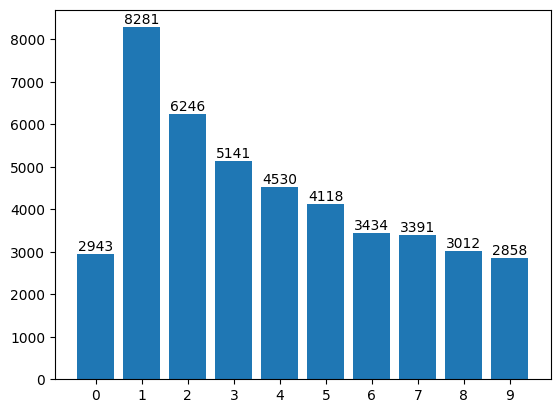

In [ ]:
trtc = train_target_classes.value_counts()
trtc = trtc.sort_index()

trtc_str = [str(i) for i in trtc.index]

barplot(trtc_str, trtc.values)

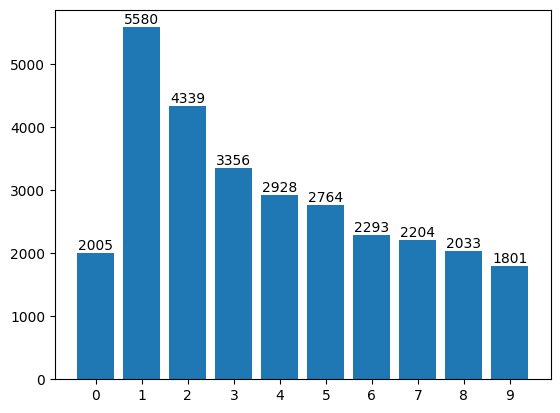

In [ ]:
vtc = val_target_classes.value_counts()
vtc = vtc.sort_index()

vtc_str = [str(i) for i in trtc.index]

barplot(vtc_str, vtc.values)

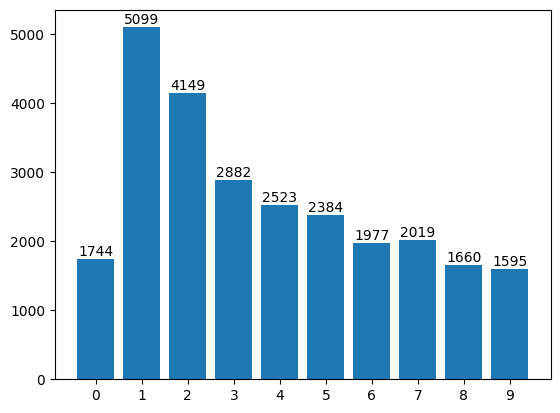

In [ ]:
tetc = test_target_classes.value_counts()
tetc = tetc.sort_index()
tetc_str = [str(i) for i in tetc.index]

barplot(tetc_str, tetc.values)

Number of pixels in the image (Height and width individually)

Text(0.5, 1.0, 'Height: 32 pixels | Width: 32 pixels')

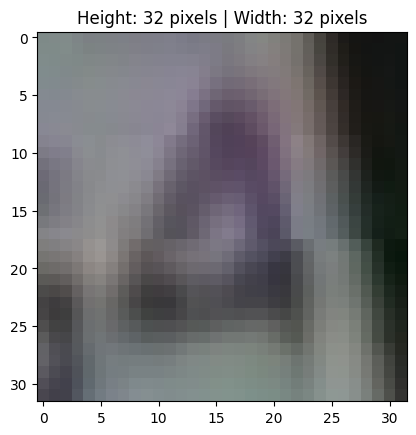

In [ ]:
train_example, _ = next(iter(train_data))
image_shape = train_example[0].shape

plt.imshow(train_example[0])
plt.title('Height: {} pixels | Width: {} pixels'.format(image_shape[0], image_shape[1]))

Display at least 2 images of each class

In [ ]:
counts = {}
images = []
for d, l in train_data:
    if np.sum(counts.values) == 20:
        break

    cs = l.numpy()
    ds = d.numpy()
    for i in range(len(cs)):
        c = cs[i]
        if c not in counts:
            counts[c] = 1
        elif counts[c] < 2:
            counts[c] +=1
        else:
            continue

        images.append([ds[i], c])

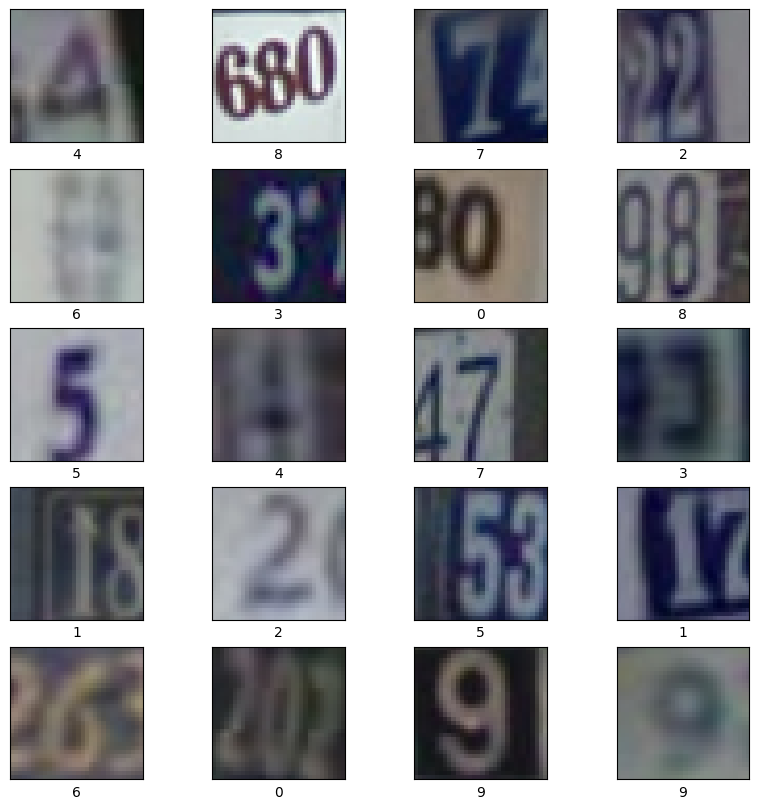

In [ ]:
plt.figure(figsize = (10, 10))
for i, im in enumerate(images):
    plt.subplot(5, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(im[0], cmap = plt.cm.binary)
    plt.xlabel(im[1])
plt.show()

**Train a neural network **

Decide number of layers and neurons in each layer

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = train_ds.map(lambda x, y: (x, tf.cast(y, tf.int64)))
val_ds = val_ds.map(lambda x, y: (x, tf.cast(y, tf.int64)))
test_ds = test_ds.map(lambda x, y: (x, tf.cast(y, tf.int64)))

In [ ]:
def create_model(num_class, hid_acti='relu', fc_act='relu', dropout=0., reg_type=None, penalty_type='L1', reg_rate=0.1):

  def full_connect_layer(neurons, pt):
    penalty = tf.keras.regularizers.L1L2(reg_rate) if \
      pt == 'L1L2' else tf.keras.regularizers.L2(reg_rate) if \
      pt == 'L2' else tf.keras.regularizers.L1(reg_rate)

    if reg_type == 'kernel':
      fc = tf.keras.layers.Dense(neurons, activation=fc_act, kernel_regularizer=penalty)
    elif reg_type == 'bias':
      fc = tf.keras.layers.Dense(neurons, activation=fc_act, bias_regularizer=penalty)
    elif reg_type == 'activity':
      fc = tf.keras.layers.Dense(neurons, activation=fc_act, activity_regularizer=penalty)
    else:
      fc = tf.keras.layers.Dense(neurons, activation=fc_act)

    return fc

  inputs = tf.keras.Input(shape=image_shape)

  conv = lambda filter: tf.keras.layers.Conv2D(filter, 3, padding='same', activation=hid_acti)

  max_pool_2d = tf.keras.layers.MaxPooling2D()

  x = conv(16)(inputs)
  x = max_pool_2d(x)
  x = conv(32)(x)
  x = max_pool_2d(x)
  x = conv(64)(x)
  x = max_pool_2d(x)
  x = tf.keras.layers.Flatten()(x)
  x = full_connect_layer(128, penalty_type)(x)

  if dropout:
    x = tf.keras.layers.Dropout(dropout)(x)

  outputs = tf.keras.layers.Dense(num_class)(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
model = create_model(len(trtc_str))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 16)           448       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  multiple                     0         ['conv2d[0][0]',              
 D)                                                                  'conv2d_1[0][0]',            
                                                                     'conv2d_2[0][0]']            
                                                                                              

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 19s 5ms/step - loss: 1.2661 - accuracy: 0.6363 - val_loss: 0.7744 - val_accuracy: 0.7645
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.6057 - accuracy: 0.8198 - val_loss: 0.5540 - val_accuracy: 0.8371
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.5095 - accuracy: 0.8499 - val_loss: 0.4804 - val_accuracy: 0.8571
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4520 - accuracy: 0.8650 - val_loss: 0.5003 - val_accuracy: 0.8513
Epoch 5/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4053 - accuracy: 0.8801 - val_loss: 0.4804 - val_accuracy: 0.8616
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3748 - accuracy: 0.8848 - val_loss: 0.5146 - val_accuracy: 0.8529
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3441 - accuracy: 0.8960 - val_loss: 0.4465 - val_accuracy

In [ ]:
results = model.evaluate(test_data, verbose=2)

for name, value in zip(model.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.5144 - accuracy: 0.8669 - 2s/epoch - 2ms/step
loss: 0.514
accuracy: 0.867


Try out different activation functions (explain each one you used)
1. Softmax is used in multi-class classification for converting input into probabilities of belonging to specific classes

2. Tanh is a scaled sigmoid function that compresses input values to the range [-1, 1]. It is useful for modeling inputs that have many strongly negative, neutral, or positive elements and require zero-centered output.

3. Elu is an activation function that solves the vanishing gradient problem in deep neural networks by allowing negative values to speed up learning.


*Using Softmax for fc layer*

In [ ]:
model_2 = create_model(len(trtc_str), fc_act='Softmax')
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_2.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 2.2444 - accuracy: 0.1869 - val_loss: 2.2344 - val_accuracy: 0.1904
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2384 - accuracy: 0.1884 - val_loss: 2.2340 - val_accuracy: 0.1904
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2384 - accuracy: 0.1884 - val_loss: 2.2340 - val_accuracy: 0.1904
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2384 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy: 0.1904
Epoch 5/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2384 - accuracy: 0.1884 - val_loss: 2.2340 - val_accuracy: 0.1904
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2383 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy: 0.1904
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2384 - accuracy: 0.1884 - val_loss: 2.2342 - val_accuracy:

In [ ]:
results = model_2.evaluate(test_data, verbose=2)

for name, value in zip(model_2.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.2249 - accuracy: 0.1959 - 2s/epoch - 2ms/step
loss: 2.225
accuracy: 0.196


*Using Tanh for fc layer*

In [ ]:
model_3 = create_model(len(trtc_str), fc_act='tanh')
model_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_3.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 2.2560 - accuracy: 0.1818 - val_loss: 2.2397 - val_accuracy: 0.1904
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2537 - accuracy: 0.1814 - val_loss: 2.2460 - val_accuracy: 0.1904
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2538 - accuracy: 0.1815 - val_loss: 2.2436 - val_accuracy: 0.1904
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2553 - accuracy: 0.1816 - val_loss: 2.2466 - val_accuracy: 0.1904
Epoch 5/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2542 - accuracy: 0.1833 - val_loss: 2.2385 - val_accuracy: 0.1904
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2535 - accuracy: 0.1816 - val_loss: 2.2452 - val_accuracy: 0.1904
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2549 - accuracy: 0.1818 - val_loss: 2.2628 - val_accuracy:

In [ ]:
results = model_3.evaluate(test_data, verbose=2)

for name, value in zip(model_3.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.2548 - accuracy: 0.1956 - 2s/epoch - 2ms/step
loss: 2.255
accuracy: 0.196


*Using Elu for fc layer*

In [ ]:
model_4 = create_model(len(trtc_str), fc_act='elu')
model_4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_4.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 1.2835 - accuracy: 0.6581 - val_loss: 0.5878 - val_accuracy: 0.8217
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.5254 - accuracy: 0.8411 - val_loss: 0.4997 - val_accuracy: 0.8482
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4324 - accuracy: 0.8683 - val_loss: 0.4666 - val_accuracy: 0.8608
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3848 - accuracy: 0.8822 - val_loss: 0.4611 - val_accuracy: 0.8647
Epoch 5/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3480 - accuracy: 0.8933 - val_loss: 0.4776 - val_accuracy: 0.8623
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3102 - accuracy: 0.9034 - val_loss: 0.4422 - val_accuracy: 0.8716
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.2810 - accuracy: 0.9130 - val_loss: 0.4804 - val_accuracy:

In [ ]:
results = model_4.evaluate(test_data, verbose=2)

for name, value in zip(model_4.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.6456 - accuracy: 0.8632 - 2s/epoch - 2ms/step
loss: 0.646
accuracy: 0.863


Try with and without using drop out

*With dropout*

In [ ]:
model_5 = create_model(len(trtc_str), dropout=0.3)
model_5.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_5.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 9s 5ms/step - loss: 1.6903 - accuracy: 0.4530 - val_loss: 0.8718 - val_accuracy: 0.7318
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.8353 - accuracy: 0.7406 - val_loss: 0.6896 - val_accuracy: 0.7843
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.6731 - accuracy: 0.7949 - val_loss: 0.5443 - val_accuracy: 0.8426
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.6020 - accuracy: 0.8186 - val_loss: 0.5004 - val_accuracy: 0.8519
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.5358 - accuracy: 0.8427 - val_loss: 0.4701 - val_accuracy: 0.8635
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4967 - accuracy: 0.8506 - val_loss: 0.4774 - val_accuracy: 0.8597
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4687 - accuracy: 0.8584 - val_loss: 0.4962 - val_accuracy:

In [ ]:
results = model_5.evaluate(test_data, verbose=2)

for name, value in zip(model_5.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.4925 - accuracy: 0.8626 - 2s/epoch - 2ms/step
loss: 0.492
accuracy: 0.863


Try different regularizations apart from drop out

*Kernel reguarlizer with L1*

In [ ]:
model_6 = create_model(len(trtc_str), reg_type='kernel', penalty_type='L1')
model_6.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_6.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 17.5119 - accuracy: 0.2869 - val_loss: 3.5193 - val_accuracy: 0.4906
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.9696 - accuracy: 0.6179 - val_loss: 2.7705 - val_accuracy: 0.6589
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.6155 - accuracy: 0.7053 - val_loss: 2.5549 - val_accuracy: 0.7120
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.4754 - accuracy: 0.7385 - val_loss: 2.3993 - val_accuracy: 0.7523
Epoch 5/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.3994 - accuracy: 0.7542 - val_loss: 2.3292 - val_accuracy: 0.7610
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3460 - accuracy: 0.7612 - val_loss: 2.3332 - val_accuracy: 0.7617
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.3112 - accuracy: 0.7733 - val_loss: 2.2898 - val_accuracy

In [ ]:
results = model_6.evaluate(test_data, verbose=2)

for name, value in zip(model_6.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.3706 - accuracy: 0.7607 - 2s/epoch - 2ms/step
loss: 2.371
accuracy: 0.761


*Kernel reguarlizer with L2*

In [ ]:
model_6 = create_model(len(trtc_str), reg_type='kernel', penalty_type='L2')
model_6.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_6.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 4.6447 - accuracy: 0.5299 - val_loss: 1.1625 - val_accuracy: 0.7666
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.9280 - accuracy: 0.7893 - val_loss: 0.7833 - val_accuracy: 0.8160
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.7492 - accuracy: 0.8212 - val_loss: 0.7226 - val_accuracy: 0.8236
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.6868 - accuracy: 0.8343 - val_loss: 0.6889 - val_accuracy: 0.8317
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.6379 - accuracy: 0.8460 - val_loss: 0.6220 - val_accuracy: 0.8523
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.6105 - accuracy: 0.8550 - val_loss: 0.5945 - val_accuracy: 0.8602
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.5852 - accuracy: 0.8615 - val_loss: 0.5823 - val_accuracy:

In [ ]:
results = model_6.evaluate(test_data, verbose=2)

for name, value in zip(model_6.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.5942 - accuracy: 0.8636 - 2s/epoch - 2ms/step
loss: 0.594
accuracy: 0.864


*Kernel reguarlizer with L1L2*

In [ ]:
model_7 = create_model(len(trtc_str), reg_type='kernel', penalty_type='L1L2')
model_7.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_7.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 22.7822 - accuracy: 0.3273 - val_loss: 3.1869 - val_accuracy: 0.5520
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.8736 - accuracy: 0.6661 - val_loss: 2.7221 - val_accuracy: 0.7089
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.6120 - accuracy: 0.7423 - val_loss: 2.5070 - val_accuracy: 0.7611
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.4647 - accuracy: 0.7741 - val_loss: 2.4203 - val_accuracy: 0.7782
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3798 - accuracy: 0.7908 - val_loss: 2.3366 - val_accuracy: 0.8094
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.3260 - accuracy: 0.8010 - val_loss: 2.3189 - val_accuracy: 0.8033
Epoch 7/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2739 - accuracy: 0.8086 - val_loss: 2.3737 - val_accuracy

In [ ]:
results = model_7.evaluate(test_data, verbose=2)

for name, value in zip(model_7.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.2546 - accuracy: 0.7993 - 2s/epoch - 2ms/step
loss: 2.255
accuracy: 0.799


*Bias reguarlizer with L1*

In [ ]:
model_8 = create_model(len(trtc_str), reg_type='bias', penalty_type='L1')
model_8.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_8.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 1.3793 - accuracy: 0.6233 - val_loss: 0.7131 - val_accuracy: 0.7930
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.6127 - accuracy: 0.8211 - val_loss: 0.5298 - val_accuracy: 0.8455
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.4948 - accuracy: 0.8551 - val_loss: 0.5041 - val_accuracy: 0.8533
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.4484 - accuracy: 0.8677 - val_loss: 0.4718 - val_accuracy: 0.8646
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.4049 - accuracy: 0.8792 - val_loss: 0.5173 - val_accuracy: 0.8502
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.3763 - accuracy: 0.8884 - val_loss: 0.4464 - val_accuracy: 0.8711
Epoch 7/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.3488 - accuracy: 0.8963 - val_loss: 0.4656 - val_accuracy:

In [ ]:
results = model_8.evaluate(test_data, verbose=2)

for name, value in zip(model_8.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.5579 - accuracy: 0.8563 - 2s/epoch - 2ms/step
loss: 0.558
accuracy: 0.856


*Bias reguarlizer with L2*

In [ ]:
model_9 = create_model(len(trtc_str), reg_type='bias', penalty_type='L2')
model_9.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_9.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 1.6152 - accuracy: 0.5310 - val_loss: 0.7554 - val_accuracy: 0.7747
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.6679 - accuracy: 0.8007 - val_loss: 0.6281 - val_accuracy: 0.8147
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.5355 - accuracy: 0.8410 - val_loss: 0.5738 - val_accuracy: 0.8299
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4760 - accuracy: 0.8586 - val_loss: 0.5306 - val_accuracy: 0.8424
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.4313 - accuracy: 0.8722 - val_loss: 0.5147 - val_accuracy: 0.8480
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3982 - accuracy: 0.8814 - val_loss: 0.4861 - val_accuracy: 0.8564
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.3708 - accuracy: 0.8886 - val_loss: 0.4732 - val_accuracy:

In [ ]:
results = model_9.evaluate(test_data, verbose=2)

for name, value in zip(model_9.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.5284 - accuracy: 0.8725 - 2s/epoch - 2ms/step
loss: 0.528
accuracy: 0.872


*Bias reguarlizer with L1L2*

In [ ]:
model_10 = create_model(len(trtc_str), reg_type='bias', penalty_type='L1L2')
model_10.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_10.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 1.2653 - accuracy: 0.6620 - val_loss: 0.6287 - val_accuracy: 0.8159
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.5857 - accuracy: 0.8305 - val_loss: 0.5780 - val_accuracy: 0.8269
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4813 - accuracy: 0.8591 - val_loss: 0.5105 - val_accuracy: 0.8519
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 0.4326 - accuracy: 0.8724 - val_loss: 0.5122 - val_accuracy: 0.8520
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.3918 - accuracy: 0.8821 - val_loss: 0.4676 - val_accuracy: 0.8647
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.3583 - accuracy: 0.8924 - val_loss: 0.4615 - val_accuracy: 0.8678
Epoch 7/10
1374/1374 [==============================] - 7s 5ms/step - loss: 0.3322 - accuracy: 0.9001 - val_loss: 0.4753 - val_accuracy:

In [ ]:
results = model_10.evaluate(test_data, verbose=2)

for name, value in zip(model_10.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 0.5607 - accuracy: 0.8671 - 2s/epoch - 2ms/step
loss: 0.561
accuracy: 0.867


*Activity reguarlizer with L1L2*

In [ ]:
model_11 = create_model(len(trtc_str), reg_type='activity', penalty_type='L1L2')
model_11.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_11.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 2.4934 - accuracy: 0.1859 - val_loss: 2.2348 - val_accuracy: 0.1904
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2383 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy: 0.1904
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2382 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy: 0.1904
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2382 - accuracy: 0.1884 - val_loss: 2.2342 - val_accuracy: 0.1904
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2382 - accuracy: 0.1884 - val_loss: 2.2342 - val_accuracy: 0.1904
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2382 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy: 0.1904
Epoch 7/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2382 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy:

In [ ]:
results = model_11.evaluate(test_data, verbose=2)

for name, value in zip(model_11.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.2243 - accuracy: 0.1959 - 2s/epoch - 2ms/step
loss: 2.224
accuracy: 0.196


Try different optimization algorithms (such as Gradient Descent, Adam etc.)

*SDG*

In [ ]:
model_12 = create_model(len(trtc_str))
model_12.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_12.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 7s 5ms/step - loss: 5.8373 - accuracy: 0.1833 - val_loss: 2.2339 - val_accuracy: 0.1904
Epoch 2/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2384 - accuracy: 0.1884 - val_loss: 2.2349 - val_accuracy: 0.1904
Epoch 3/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2385 - accuracy: 0.1884 - val_loss: 2.2342 - val_accuracy: 0.1904
Epoch 4/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2385 - accuracy: 0.1884 - val_loss: 2.2342 - val_accuracy: 0.1904
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2385 - accuracy: 0.1884 - val_loss: 2.2340 - val_accuracy: 0.1904
Epoch 6/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2385 - accuracy: 0.1884 - val_loss: 2.2341 - val_accuracy: 0.1904
Epoch 7/10
1374/1374 [==============================] - 6s 5ms/step - loss: 2.2385 - accuracy: 0.1884 - val_loss: 2.2340 - val_accuracy:

In [ ]:
results = model_12.evaluate(test_data, verbose=2)

for name, value in zip(model_12.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.2249 - accuracy: 0.1959 - 2s/epoch - 2ms/step
loss: 2.225
accuracy: 0.196


*Adamax*

In [ ]:
model_13 = create_model(len(trtc_str), reg_type='activity', penalty_type='L1L2')
model_13.compile(optimizer='adamax', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_13.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 2.7161 - accuracy: 0.1861 - val_loss: 2.2532 - val_accuracy: 0.1904
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2460 - accuracy: 0.1884 - val_loss: 2.2377 - val_accuracy: 0.1904
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2394 - accuracy: 0.1884 - val_loss: 2.2350 - val_accuracy: 0.1905
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2383 - accuracy: 0.1884 - val_loss: 2.2344 - val_accuracy: 0.1904
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2382 - accuracy: 0.1884 - val_loss: 2.2343 - val_accuracy: 0.1904
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2381 - accuracy: 0.1884 - val_loss: 2.2344 - val_accuracy: 0.1904
Epoch 7/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.2381 - accuracy: 0.1884 - val_loss: 2.2343 - val_accuracy:

In [ ]:
results = model_13.evaluate(test_data, verbose=2)

for name, value in zip(model_13.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.2245 - accuracy: 0.1958 - 2s/epoch - 2ms/step
loss: 2.225
accuracy: 0.196


*Adadelta*

In [ ]:
model_14 = create_model(len(trtc_str), reg_type='activity', penalty_type='L1L2')
model_14.compile(optimizer='adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])
model_14.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1374/1374 [==============================] - 8s 5ms/step - loss: 40.4546 - accuracy: 0.1036 - val_loss: 3.2139 - val_accuracy: 0.1202
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.5700 - accuracy: 0.1430 - val_loss: 2.3821 - val_accuracy: 0.1718
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3529 - accuracy: 0.1750 - val_loss: 2.3352 - val_accuracy: 0.1806
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3275 - accuracy: 0.1801 - val_loss: 2.3215 - val_accuracy: 0.1838
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3183 - accuracy: 0.1830 - val_loss: 2.3153 - val_accuracy: 0.1856
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3135 - accuracy: 0.1840 - val_loss: 2.3117 - val_accuracy: 0.1865
Epoch 7/10
1374/1374 [==============================] - 7s 5ms/step - loss: 2.3104 - accuracy: 0.1852 - val_loss: 2.3093 - val_accuracy

In [ ]:
results = model_14.evaluate(test_data, verbose=2)

for name, value in zip(model_14.metrics_names, results): print("%s: %.3f" % (name, value))

814/814 - 2s - loss: 2.3241 - accuracy: 0.1880 - 2s/epoch - 2ms/step
loss: 2.324
accuracy: 0.188


Create a graph of f1 score vs epochs for training and validation set

In [ ]:
precision_metric = tf.metrics.Precision()
recall_metric = tf.metrics.Recall()

def precision(y_true, y_pred):
    pred = tf.argmax(y_pred, 1)
    precision_metric.update_state(y_true, pred)
    return precision_metric.result()

def recall(y_true, y_pred):
    pred = tf.argmax(y_pred, 1)
    recall_metric.update_state(y_true, pred)
    return recall_metric.result()

In [ ]:
model_15 = create_model(len(trtc_str))
model_15.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=[precision, recall])
history = model_15.fit(train_ds, validation_data=val_ds, epochs=10)
results = model_15.evaluate(test_ds, verbose=2)
for name, value in zip(model_15.metrics_names, results): print("%s: %.3f" % (name, value))

Epoch 1/10
1374/1374 [==============================] - 9s 5ms/step - loss: 8.1099 - precision: 0.9333 - recall: 0.9994 - val_loss: 8.0735 - val_precision: 0.9325 - val_recall: 0.9999
Epoch 2/10
1374/1374 [==============================] - 7s 5ms/step - loss: 8.1113 - precision: 0.9327 - recall: 1.0000 - val_loss: 8.0735 - val_precision: 0.9326 - val_recall: 1.0000
Epoch 3/10
1374/1374 [==============================] - 7s 5ms/step - loss: 8.1113 - precision: 0.9325 - recall: 1.0000 - val_loss: 8.0735 - val_precision: 0.9326 - val_recall: 1.0000
Epoch 4/10
1374/1374 [==============================] - 7s 5ms/step - loss: 8.1113 - precision: 0.9326 - recall: 1.0000 - val_loss: 8.0735 - val_precision: 0.9324 - val_recall: 1.0000
Epoch 5/10
1374/1374 [==============================] - 7s 5ms/step - loss: 8.1113 - precision: 0.9325 - recall: 1.0000 - val_loss: 8.0735 - val_precision: 0.9325 - val_recall: 1.0000
Epoch 6/10
1374/1374 [==============================] - 7s 5ms/step - loss: 8.11

In [ ]:
print(history.history['precision'])
print(history.history['recall'])

[0.9333062767982483, 0.932655930519104, 0.932496964931488, 0.9325661659240723, 0.932471752166748, 0.9325038194656372, 0.9324678182601929, 0.9324917197227478, 0.9325070381164551, 0.9325099587440491]
[0.9994235634803772, 0.9999642968177795, 0.9999907612800598, 0.9999971389770508, 0.9999976754188538, 0.9999977946281433, 0.9999992847442627, 0.9999992847442627, 0.9999994039535522, 0.9999994039535522]


Text(0.5, 1.0, 'Training and Validation F1 Score')

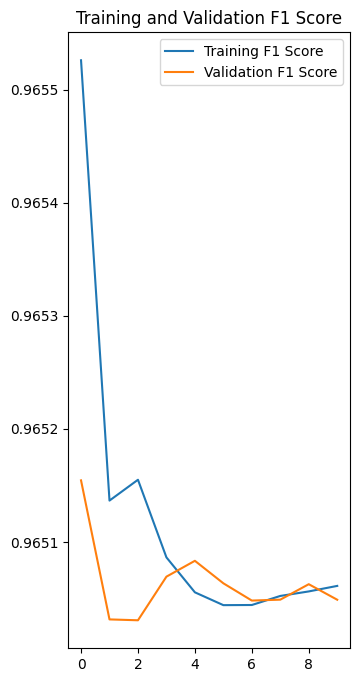

In [ ]:
train_precision = np.array(history.history['precision'])
val_precision = np.array(history.history['val_precision'])

train_recall = np.array(history.history['recall'])
val_recall = np.array(history.history['val_recall'])

train_f1_score = 2 * (train_precision * train_recall) / (train_precision + train_recall)
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_f1_score, label='Training F1 Score')
plt.plot(epochs_range, val_f1_score, label='Validation F1 Score')
plt.legend(loc='upper right')
plt.title('Training and Validation F1 Score')

Calculate the number of trainable parameters in your final model

In [ ]:
model_15.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 32, 32, 16)           448       ['input_16[0][0]']            
                                                                                                  
 max_pooling2d_15 (MaxPooli  multiple                     0         ['conv2d_45[0][0]',           
 ng2D)                                                               'conv2d_46[0][0]',           
                                                                     'conv2d_47[0][0]']           
                                                                                           